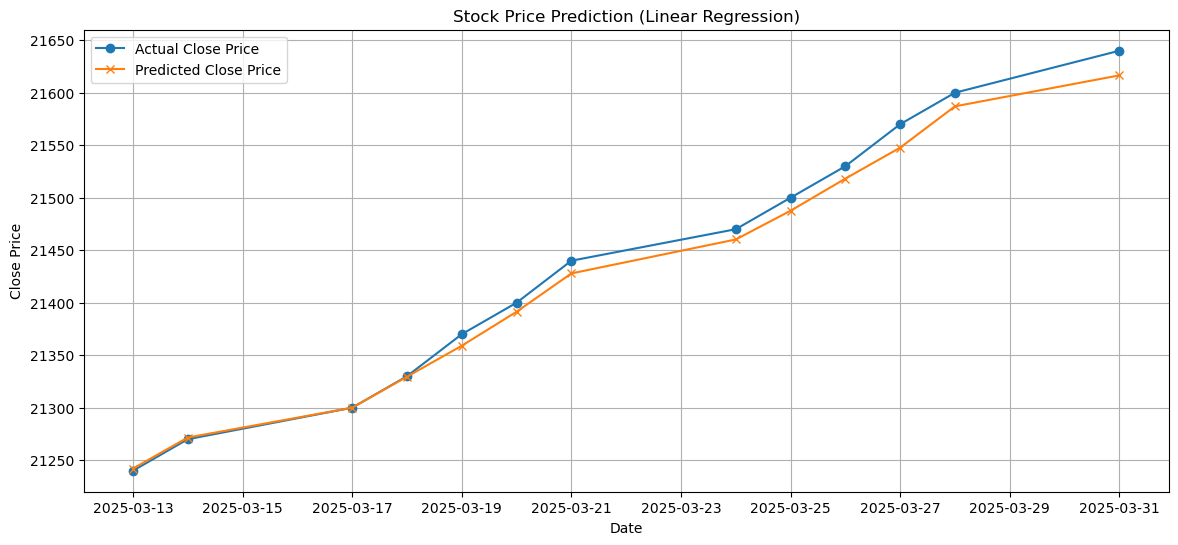

Predicted next close price: 21656.96


In [2]:
# 📈 Stock Price Prediction — Internship Mini Project
# Full version: multiple features, for Nifty50 style data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1️⃣ Load CSV
df = pd.read_csv("C:/Users/prava/Downloads/AIML Class Summer Internship/Projects and their CSVs/Stock price Prediction - MINI Project/Stock Price Prediction - Mini Project.csv")

# 2️⃣ Convert Date & sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 3️⃣ Create lag features
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)

# 4️⃣ Drop first row (because lag = NaN)
df = df.dropna()

# 5️⃣ Features & target
features = ['Prev_Close', 'Prev_High', 'Prev_Low']
X = df[features]
y = df['Close']

# 6️⃣ Train-test split (80% train, 20% test)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 7️⃣ Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 8️⃣ Predict on test
y_pred = model.predict(X_test)

# 9️⃣ Plot Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(df['Date'][split_idx:], y_test, label='Actual Close Price', marker='o')
plt.plot(df['Date'][split_idx:], y_pred, label='Predicted Close Price', marker='x')
plt.title('Stock Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# 🔟 Predict Tomorrow’s Close
latest_data = df.iloc[-1]  # last row
tomorrow_input = pd.DataFrame([[
    latest_data['Close'],
    latest_data['High'],
    latest_data['Low']
]], columns=features)

tomorrow_pred = model.predict(tomorrow_input)
print(f"Predicted next close price: {tomorrow_pred[0]:.2f}")
